# Use Case: Brain MRI Classification Using Deep Learning

### Business Understanding

#### <u>What is Brain MRI(Magnetic Resonance Imaging)?

Brain MRI (Magnetic Resonance Imaging) is a non-invasive imaging technology that produces detailed images of the brain and brain stem. It helps in diagnosing various conditions, including tumors, strokes, and developmental anomalies.ays.

#### Why is it worth solving?¶Early detection is essential for effective treatment of brain tumors, which represent a serious threat to life. Improved patient outcomes by enabling faster and more accurate tumor diagnosis through the automation of brain MRI image classification..

#### Stakeholders

<b>Doctors:</b> Benefit from faster and more accurate diagnostics.

<b>Patients:</b> Receive timely and precise diagnosis and treatment.

<b>Pharmaceutical Companies:</b> Can use data to develop targeted therapies.

<b>Hospitals:</b> Improve operational efficiency and patient care quality.

### Problem Statement

#### What problem are you solving?

The problem is to develop a model that can automatically classify brain MRI images into two categories: 'tumor' and 'no tumor' to assist in early diagnosis and treatment planning.

### Data Collection

<b>Source:</b> The dataset is sourced from <a href="https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection">Kaggle</a>, containing labeled MRI images of brains with and without tumors.

### Data Understanding
The dataset consists of MRI images labeled as 'yes' (indicating the presence of a tumor) and 'no' (indicating the absence of a tumor).

These labels need to be converted into binary categories for the model: 'tumor' and 'notumor'.

### Data Preparation

<b>Cropping Images</b>

Normalize images using mean and standard deviation values: ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

<b>Required Libraries</b>
Libraries such as <b>torch, torchvision & PIL</b> building and training the model

<b>Data Directory Setup</b>
Organize the dataset into appropriate training and validation directories for easy access during model training

<b>ResNet-18 Model</b>
It allows to loading the pre-trained model and fine-tuning it on the brain MRI dataset

#### Installing required libraries by using PIP Function

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torchvision

#### Importing libraries

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms, models
from PIL import Image 

<b>import torch:</b> Imports the main PyTorch library which provides tensor operations and general neural network functionality

<b>import torch.nn as nn:</b> Imports the neural network module, providing building blocks for constructing neural network layers

<b>import torch.optim as optim:</b> Imports the optimization module, which includes various optimization algorithms like SGD, Adam, etc

<b>from torchvision import datasets, transforms, models:</b> Imports specific modules from torchvision, a package that provides datasets, pre-trained models, and common image transformations

<b>import os:</b> Imports the os module for interacting with the operating system, such as reading file paths and directories

<b>from PIL import Image:</b> PIL handles opening images, manipulation and saving the images fr preprocessong before ML training

<b>import matplotlib.pyplot as plt:</b> It's create plot and histograms for exploration and preprocessing

<b>import numpy as np:</b> NumPy uses for numerical computing with arrays and matrices, transforming and preparing image data for models

<b>Data transformations process for Data Augmentation and Normalization

<b>Transformations ensure that the images are resized, cropped, and normalized properly

In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), 
        transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256), 
        transforms.CenterCrop(224), 
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

<b>transforms.Compose([...]):</b>

Combines several transformations into one

<b>transforms.RandomResizedCrop(224):</b>

Randomly crops a region from the image and then resizes it to 224x224 pixels for introducing variation in the training data to help the model generalize better by preventing it from learning to recognize images based on their position or scale.

<b>transforms.RandomHorizontalFlip():</b>

Randomly flips the image horizontally with a probability of 0.5 for further augments the training data by adding horizontal reflections of the images, which helps in making the model invariant to horizontal orientation

<b>transforms.ToTensor():</b> 

Converts the image from a PIL image or NumPy array to a PyTorch tensor, scaling pixel values to the range [0, 1]

<b>transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]):</b>

Normalizes the image tensor using the mean and standard deviation of the ImageNet dataset for each channel (RGB).
Purpose: Standardizes the input data to have a mean of 0 and a standard deviation of 1, which helps in faster and more stable training of the model.

<b>transforms.Resize((256, 256)):</b> 

Resizes the image to 256x256 pixels. This ensures the image is large enough to apply the subsequent center crop

<b>transforms.CenterCrop(224):</b> 

Crops the center 224x224 portion of the image


#### Define the data directory
#### Create data loaders
#### Data loaders allow us to iterate over the dataset in batches

In [9]:
data_dir = 'dataset/'
 
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 253
     Root location: dataset/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 253
     Root location: dataset/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [10]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)
 
class_names = image_datasets['train'].classes
class_names

{'train': 253, 'val': 253}


['NoTumor', 'Tumor']

<b>Create Data Loaders:</b> <br>The code creates data loaders for the training and validation datasets using DataLoader from torch.utils.data. It specifies a batch size of 4, enables shuffling of data, and sets the number of worker threads to 4 for parallel data loading.

<b>Calculate Dataset Sizes:</b> <br>It calculates the sizes of the training and validation datasets and stores them in the dataset_sizes dictionary. In the next line, it prints the sizes of the training and validation datasets.

<b>Get Class Names:</b> <br>It retrieves the class names from the training dataset and stores them in the class_names variable.

Load the pre-trained ResNet-18 model

Freeze all layers except the final classification layer

Freezing prevents the weights from being updated during training

In [11]:
model = models.resnet18(pretrained=True)
 
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False
 
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters
 
 
# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

C:\Users\shrin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\shrin\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<b>Load Pre-trained ResNet-18 Model:</b> <br>The code loads a pre-trained ResNet-18 model from torchvision.models.

<b>Freeze Layers:</b> <br>It freezes all layers of the model except the final fully connected (classification) layer by setting requires_grad to False for all parameters except those in the final layer.

<b>Define Loss Function and Optimizer:</b> <br>It defines the loss function as cross-entropy loss and sets up the optimizer as stochastic gradient descent (SGD) with a learning rate of 0.001 and momentum of 0.9. The optimizer will update all model parameters.

<b>Move Model to GPU:</b> <br>It checks if a GPU is available and, if so, moves the model to the GPU for faster computation. If no GPU is available, it uses the CPU.

#### Training loop
#### epochs is number of the time we training the model

In [12]:
num_epochs = 5
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()
 
        running_loss = 0.0
        running_corrects = 0
 
        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)
 
            optimizer.zero_grad()
 
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
 
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
 
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
 
        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]
 
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
 
print("Training complete!")

train Loss: 1.7930 Acc: 0.4941
val Loss: 1.3446 Acc: 0.4980
train Loss: 0.9463 Acc: 0.6245
val Loss: 0.8294 Acc: 0.6601
train Loss: 0.6576 Acc: 0.7075
val Loss: 0.3386 Acc: 0.8656
train Loss: 0.7199 Acc: 0.7075
val Loss: 0.3793 Acc: 0.8142
train Loss: 0.7017 Acc: 0.7431
val Loss: 0.4007 Acc: 0.8024
Training complete!


<b>Set Number of Epochs:</b> <br>The code sets the number of training epochs to 5.

<b>Training Loop:</b> <br>It iterates over the specified number of epochs. For each epoch, it performs operations for both training and validation phases.

<b>Set Model Mode:</b> <br>During the training phase, the model is set to training mode using model.train(). During the validation phase, it is set to evaluation mode using model.eval().

<b>Initialize Running Loss and Corrects:</b> <br>It initializes variables to accumulate the loss and the number of correct predictions.

<b>Data Loading and Device Transfer:</b> <br>For each batch of inputs and labels from the data loader, it transfers them to the device (GPU or CPU).

<b>Forward Pass and Loss Calculation:</b> <br>It performs a forward pass through the model to get the outputs and predictions, and calculates the loss using the criterion. Gradients are only calculated during the training phase.

<b>Backward Pass and Optimization:</b> <br>During the training phase, it performs a backward pass to compute gradients and updates the model parameters using the optimizer.

<b>Accumulate Loss and Corrects:</b> <br>It accumulates the loss and the number of correct predictions for the current batch.

<b>Calculate Epoch Loss and Accuracy:</b> <br>After processing all batches, it calculates the average loss and accuracy for the epoch.

<b>Print Loss and Accuracy:</b> <br>It prints the loss and accuracy for the current phase (training or validation).

<b>Training Complete Message:</b> <br>After all epochs are completed, it prints a message indicating that training is complete.

Save the model

In [13]:
torch.save(model.state_dict(), 'Brain_MRI_identification_model.pth')

In [14]:
# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('Brain_MRI_identification_model.pth'))
model.eval()
 
# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units
 
# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]

new_model = new_model.to(device)

<b>Load and Adjust Saved Model:</b>
<br>Loads a pre-trained ResNet-18 model.
Modifies the final fully connected layer (fc) to have 1000 output units to match the original model's architecture.
Loads weights into the modified model from a saved state dictionary (chestxray_identification_model.pth).
Sets the model to evaluation mode.

<b>Create a New Model:</b>
<br>Creates a new ResNet-18 model with the correct number of output units for the desired task (2 units).

<b>Transfer Weights and Biases:</b>
<br>Copies the weights and biases from the final layer of the loaded model to the corresponding layer of the new model, but only the first 2 output units.

## <B>Prepare your new image for classification. You should use the same data transformations you used during training. 

## Example Predictions
#### 1. Wrong Prediction - False Negative

In [38]:
# Load and preprocess the unseen image
image_path = './dataset/train/NoTumor/25 no.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
print(input_tensor.shape) 
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

torch.Size([3, 224, 224])


In [39]:
# Perform inference
input_batch = input_batch.to(device)
with torch.no_grad():
    output = model(input_batch)
 
# Get the predicted class
    _, predicted_class = torch.max(output, 1)
 
# Map the predicted class to the class name
    class_names = ['Tumor', 'NoTumor']  # Make sure these class names match your training data
    predicted_class_name = class_names[predicted_class.item()]


print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Tumor


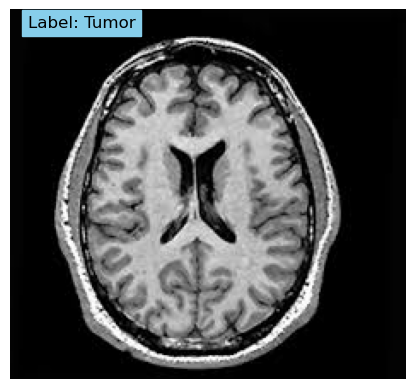

In [40]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Label: {predicted_class_name}', fontsize=12, color='black', backgroundcolor='skyblue')
plt.show()

#### 2. Wrong Prediction - False Negative

In [41]:
# Load and preprocess the unseen image
image_path = './dataset/train/NoTumor/No19.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
print(input_tensor.shape) 
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

torch.Size([3, 224, 224])


In [44]:
# Perform inference
input_batch = input_batch.to(device)
with torch.no_grad():
    output = model(input_batch)
 
# Get the predicted class
    _, predicted_class = torch.max(output, 1)
 
# Map the predicted class to the class name
    class_names = ['Tumor', 'NoTumor']  # Make sure these class names match your training data
    predicted_class_name = class_names[predicted_class.item()]


print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Tumor


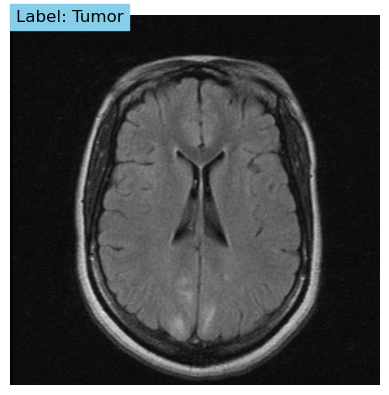

In [45]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Label: {predicted_class_name}', fontsize=12, color='black', backgroundcolor='skyblue')
plt.show()

#### 3. Correct Prediction - True Negative

In [62]:
# Load and preprocess the unseen image
image_path = './dataset/train/NoTumor/No12.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
print(input_tensor.shape) 
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

torch.Size([3, 224, 224])


In [63]:
# Perform inference
input_batch = input_batch.to(device)
with torch.no_grad():
    output = model(input_batch)
 
# Get the predicted class
    _, predicted_class = torch.max(output, 1)
 
# Map the predicted class to the class name
    class_names = ['NoTumor', 'Tumor']  # Make sure these class names match your training data
    predicted_class_name = class_names[predicted_class.item()]


print(f'The predicted class is: {predicted_class_name}')

The predicted class is: NoTumor


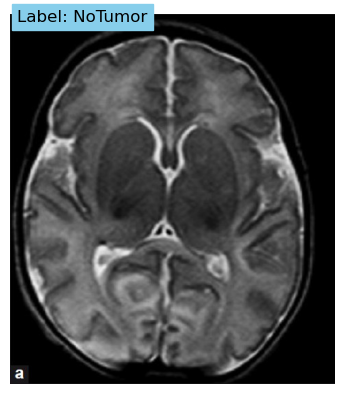

In [64]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Label: {predicted_class_name}', fontsize=12, color='black', backgroundcolor='skyblue')
plt.show()

#### 4. Correct Prediction - True Positive

In [65]:
# Load and preprocess the unseen image
image_path = './dataset/train/Tumor/Y7.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
print(input_tensor.shape) 
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

torch.Size([3, 224, 224])


In [66]:
# Perform inference
input_batch = input_batch.to(device)
with torch.no_grad():
    output = model(input_batch)
 
# Get the predicted class
    _, predicted_class = torch.max(output, 1)
 
# Map the predicted class to the class name
    class_names = ['NoTumor', 'Tumor']  # Make sure these class names match your training data
    predicted_class_name = class_names[predicted_class.item()]


print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Tumor


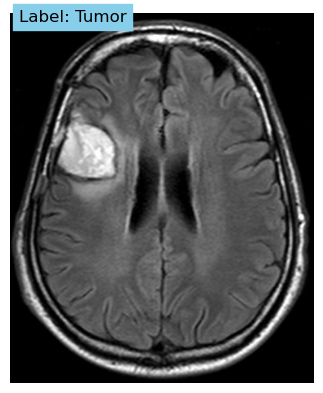

In [67]:
# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Label: {predicted_class_name}', fontsize=12, color='black', backgroundcolor='skyblue')
plt.show()

#### <b>1. Conclusions

-- The model achieved a certain accuracy (to be determined from the actual results) in classifying brain MRI images into 'tumor' and 'notumor' categories.

-- Automation of MRI classification can significantly speed up the diagnostic process.

#### <b>2. Future Improvements

-- Increase the dataset size for better model generalization.

-- Experiment with more complex models or ensemble methods.

-- Implement data augmentation techniques to improve model robustness.

#### <b>3. Real-Life Application

-- The solution can be integrated into hospital diagnostic systems to assist radiologists.

-- It can be used as a preliminary diagnostic tool in remote areas where access to specialists is limited.

#### <b>4. Client Value

-- Hospitals can improve diagnostic accuracy and speed, enhancing patient care.

-- Doctors can focus more on treatment plans rather than spending extensive time on diagnosis.

#### <b>5. Learning Outcomes

-- Gained practical experience in applying deep learning techniques to medical imaging.

-- Understood the challenges and considerations in handling medical data.

-- Learned the process of fine-tuning pre-trained models for specific tasks.